# **Week 3 Project: House Price Prediction**

### **Importing Libraries**

In [42]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# removes warnings from the outputs
import warnings
warnings.filterwarnings('ignore')

In [44]:
# reading data
df=pd.read_csv('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000.0,8960.0,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000.0,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000.0,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,yes,no,yes,no,no,NaN,no,unfurnished
541,1767150.0,2400.0,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000.0,3620.0,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,NaN,2910.0,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished


### **Preprocessing**

In [45]:
df.isnull().sum()

,0
price,7
area,2
bedrooms,1
bathrooms,3
stories,2
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [46]:
# filling the null values with medians
price_median=np.floor(df['price'].median())
area_median=np.floor(df['area'].median())
bedrooms_median=np.floor(df['bedrooms'].median())
bathrooms_median=np.floor(df['bathrooms'].median())
stories_median=np.floor(df['stories'].median())
parking_median=np.ceil(df['parking'].mean())
print('Price: ',price_median)
print('Area: ',area_median)
print('Bedrooms: ',bedrooms_median)
print('Bathrooms: ',bathrooms_median)
print('Stories: ',stories_median)
print('Parking: ',parking_median)


Price:  4340000.0
Area:  4560.0
Bedrooms:  3.0
Bathrooms:  1.0
Stories:  2.0
Parking:  1.0


In [47]:
df['price']=df['price'].fillna(price_median)
df['area']=df['area'].fillna(area_median)
df['bedrooms']=df['bedrooms'].fillna(bedrooms_median)
df['bathrooms']=df['bathrooms'].fillna(bathrooms_median)
df['stories']=df['stories'].fillna(stories_median)
df['parking']=df['parking'].fillna(parking_median)

In [48]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [49]:
# finding shape of the dataset
df.shape

(545, 13)

In [50]:
# looking for duplicate rows
df[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [51]:
# finding categories in the column
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

**Encoding**

In [54]:
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})
df['guestroom']=df['guestroom'].map({'yes':1,'no':0})
df['basement']=df['basement'].map({'yes':1,'no':0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})
df['furnishingstatus']=df['furnishingstatus'].map({'furnished':2,'semi-furnished':1,'unfurnished':0})

In [55]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,2
1,12250000.0,8960.0,4.0,4.0,4.0,1,0,0,0,1,3.0,0,2
2,12250000.0,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1
3,12215000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,3.0,1,2
4,11410000.0,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,1,0,1,0,0,1.0,0,0
541,1767150.0,2400.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,1
542,1750000.0,3620.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,0
543,4340000.0,2910.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,2


**spliting inputs & outputs**

In [56]:
x=df.drop('price', axis=1)
y=df['price']

### **Model Training before Regularization**

random state will fix the randomness in the data. Instead of 2, any number could be placed

In [83]:
# importing test_train split library
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=2)

In [59]:
# importing library for performing Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(train_x,train_y)

In [63]:
# printing results
print('-------------Before Regularization-------------')
print('\nTraining Accuracy: ',reg.score(train_x,train_y))
print('Testing Accuracy: ',reg.score(test_x,test_y))

-------------Before Regularization-------------

Training Accuracy:  0.6605072117244186
Testing Accuracy:  0.617663830974223


### **Model Training before Regularization**

In [64]:
# importing library for regularization
from sklearn.linear_model import Ridge, Lasso

alpha controls how strong the penalty (regularization) is.<br>
Higher alpha → more penalty → coefficients shrink more.<br>
Lower alpha → less penalty → coefficients are closer to normal Linear Regression.<br>
alpha=0 → no penalty at all → same as plain Linear Regression.

In [73]:
ridge=Ridge(alpha=1.0)
lasso=Lasso(alpha=50)

In [74]:
# training with L2
ridge.fit(train_x,train_y)

Ridge()

In [75]:
# training with L1
lasso.fit(train_x,train_y)

Lasso(alpha=50)

In [76]:
# printing results with Regularization
print('-------------After Regularization-------------')
print('\nLasso Training Accuracy: ',lasso.score(train_x,train_y))
print('Lasso Testing Accuracy: ',lasso.score(test_x,test_y))
print('\nRidge Training Accuracy: ',ridge.score(train_x,train_y))
print('Ridge Testing Accuracy: ',ridge.score(test_x,test_y))

-------------After Regularization-------------

Lasso Training Accuracy:  0.6605071711369102
Lasso Testing Accuracy:  0.6176551729960214

Ridge Training Accuracy:  0.6604682931562162
Ridge Testing Accuracy:  0.6174735290721864


### **Visualization**

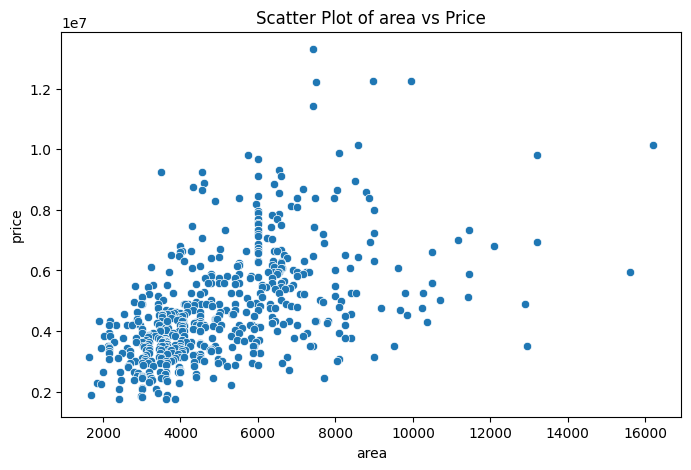

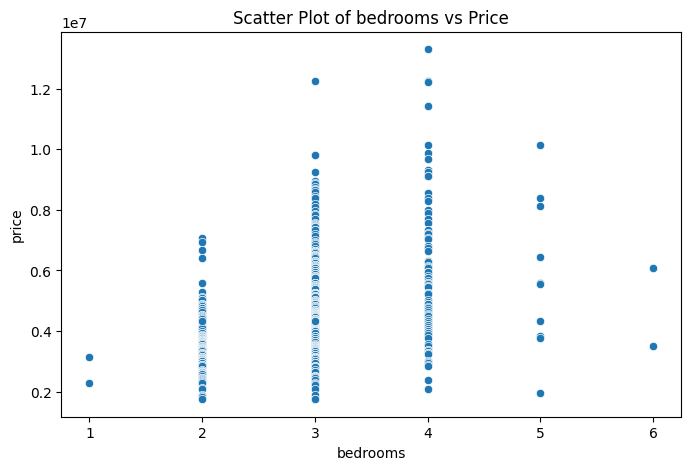

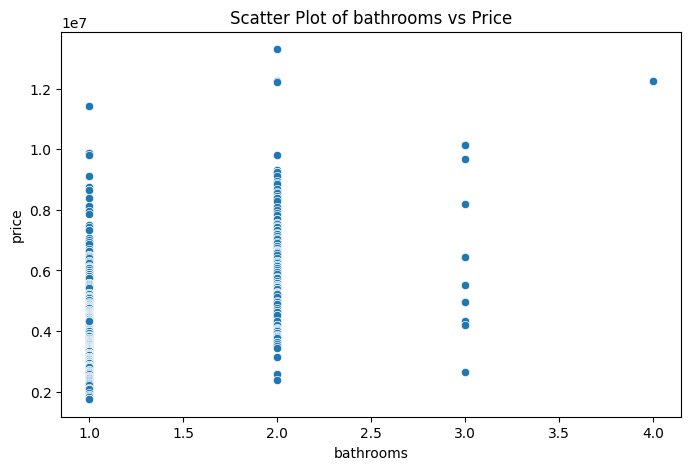

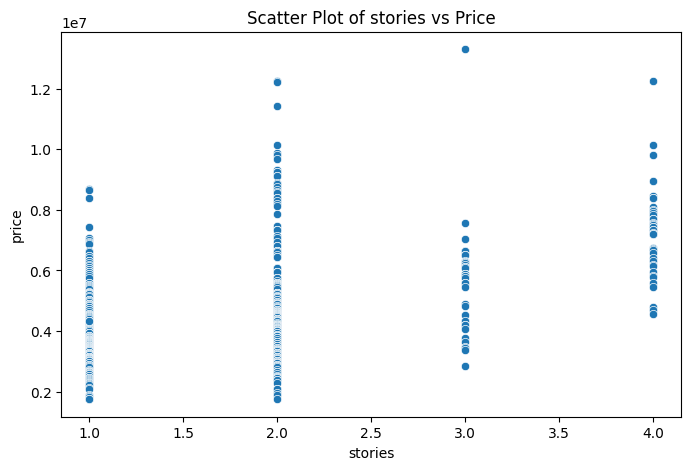

In [84]:
# Scatter plots of numerical features against price
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=col, y='price', data=df)
    plt.title(f'Scatter Plot of {col} vs Price')
    plt.show()